In [1]:
# resolve proxy


def resolve_proxy():
    import os
    os.environ['HTTP_PROXY']="http://10.8.0.1:8080"
    os.environ['HTTPS_PROXY']="http://10.8.0.1:8080"
    os.environ['http_proxy'] = "http://10.8.0.1:8080" 
    os.environ['https_proxy'] = "http://10.8.0.1:8080" 
resolve_proxy()

In [2]:
from os.path import expanduser, join
home = expanduser('~')

dname = join(home, '.dipy', 'sherbrooke_3shell')

fdwi = join(dname, 'HARDI193.nii.gz')
print(fdwi)
fbval = join(dname, 'HARDI193.bval')
print(fbval)
fbvec = join(dname, 'HARDI193.bvec')
print(fbvec)

/home/ang/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/home/ang/.dipy/sherbrooke_3shell/HARDI193.bval
/home/ang/.dipy/sherbrooke_3shell/HARDI193.bvec


In [3]:
from dipy.io.image import load_nifti
import matplotlib.pyplot as plt
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.io.image import save_nifti


# TODO: is this affine the affine reg
data, affine, img = load_nifti(fdwi, return_img=True)

In [4]:
print(data.shape)

(128, 128, 60, 193)


In [5]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


In [7]:
data.shape[2] // 2

30

In [10]:
# first 3 dimensions are i,j,k voxel coordinates and last dims is number of non-weighted (S0s)
# and diffusion weighted volumes
data.shape

(128, 128, 60, 193)

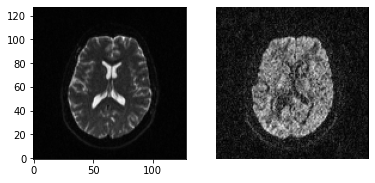

<Figure size 432x288 with 0 Axes>

In [6]:

axial_middle = data.shape[2] // 2

plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [10]:
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [17]:

gtab = gradient_table(bvals, bvecs)

In [18]:
print(gtab.info)

B-values shape (193,)
         min 0.000000
         max 3500.000000
B-vectors shape (193, 3)
          min -0.964050
          max 0.999992

None


In [19]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [20]:
print(gtab.bvecs[:10, :])
S0s = data[:, :, :, gtab.b0s_mask]
print(S0s.shape)


[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]
(128, 128, 60, 1)


In [21]:
save_nifti('HARDI193_S0.nii.gz', S0s, affine)